# Modelo de clasificación de accidentalidad laboral mediante árboles de decisión

**Elias Buitrago Bolivar** <br>
*Bogotá, Colombia* <br>
*7/abril/2021* <br>
*Las actualizaciones de este código se encuentran en mi cuenta [github](https://github.com/ebuitrago/BI/blob/main/ARL_accidentes_trabajo/modelo_AT_arboles.ipynb)*

## Cargar librerías

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import metrics, svm
from sklearn.metrics import recall_score
import graphviz
import seaborn as sns

## Cargar datos

In [29]:
#Cargar datos para el modelo
#En PowerBI se creo un nuevo dataset a partir de los datos original con el objetivo de filtrar variables de interés.
col_names = ['id_trabajador', 'edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'accidentado', 'id_accidente', 'parte_del_cuerpo', 'lesion', 
             'sector_economico', 'tipo_empresa', 'sistema_gestion']
trabajadores_full = pd.read_excel("datos/trabajadores_full.xlsx", names=col_names)
trabajadores_full.head()
trabajadores_full.shape

(3000, 17)

In [30]:
#Transformar variables string a numérico
trabajadores_full_num = trabajadores_full
trabajadores_full_num['genero'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['genero'])
trabajadores_full_num['nivel_educativo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['nivel_educativo'])
trabajadores_full_num['tipo_cargo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_cargo'])
trabajadores_full_num['jornada'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['jornada'])
# trabajadores_full_num['parte_del_cuerpo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['parte_del_cuerpo'])
# trabajadores_full_num['lesion'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['lesion'])
trabajadores_full_num['sector_economico'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['sector_economico'])
trabajadores_full_num['tipo_empresa'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_empresa'])

In [31]:
trabajadores_full_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trabajador     3000 non-null   int64 
 1   edad              3000 non-null   int64 
 2   genero            3000 non-null   int32 
 3   nivel_educativo   3000 non-null   int32 
 4   num_hijos         3000 non-null   int64 
 5   tipo_cargo        3000 non-null   int32 
 6   capacitado        3000 non-null   int64 
 7   jornada           3000 non-null   int32 
 8   antiguedad        3000 non-null   int64 
 9   id_empresa        3000 non-null   int64 
 10  accidentado       3000 non-null   int64 
 11  id_accidente      3000 non-null   int64 
 12  parte_del_cuerpo  3000 non-null   object
 13  lesion            3000 non-null   object
 14  sector_economico  3000 non-null   int32 
 15  tipo_empresa      3000 non-null   int32 
 16  sistema_gestion   3000 non-null   int64 
dtypes: int32(6), i

In [32]:
# Variables para el modelo
feature_cols=['edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'sector_economico', 'tipo_empresa', 
             'sistema_gestion']
X = trabajadores_full_num[feature_cols] # Caracteristicas
y = trabajadores_full_num.accidentado # Variable objetivo
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              3000 non-null   int64
 1   genero            3000 non-null   int32
 2   nivel_educativo   3000 non-null   int32
 3   num_hijos         3000 non-null   int64
 4   tipo_cargo        3000 non-null   int32
 5   capacitado        3000 non-null   int64
 6   jornada           3000 non-null   int32
 7   antiguedad        3000 non-null   int64
 8   id_empresa        3000 non-null   int64
 9   sector_economico  3000 non-null   int32
 10  tipo_empresa      3000 non-null   int32
 11  sistema_gestion   3000 non-null   int64
dtypes: int32(6), int64(6)
memory usage: 211.1 KB


## Definición del modelo

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # 70% training and 30% test
arbol1 = DecisionTreeClassifier()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1500, 12) (1500, 12)
(1500,) (1500,)


## Entrenamiento y evaluación del modelo

In [34]:
arbol1 = arbol1.fit(X_train,y_train)
y_pred = arbol1.predict(X_test)     
print("La exactitud del árbol de clasificación inicial es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación inicial es: 0.5953333333333334


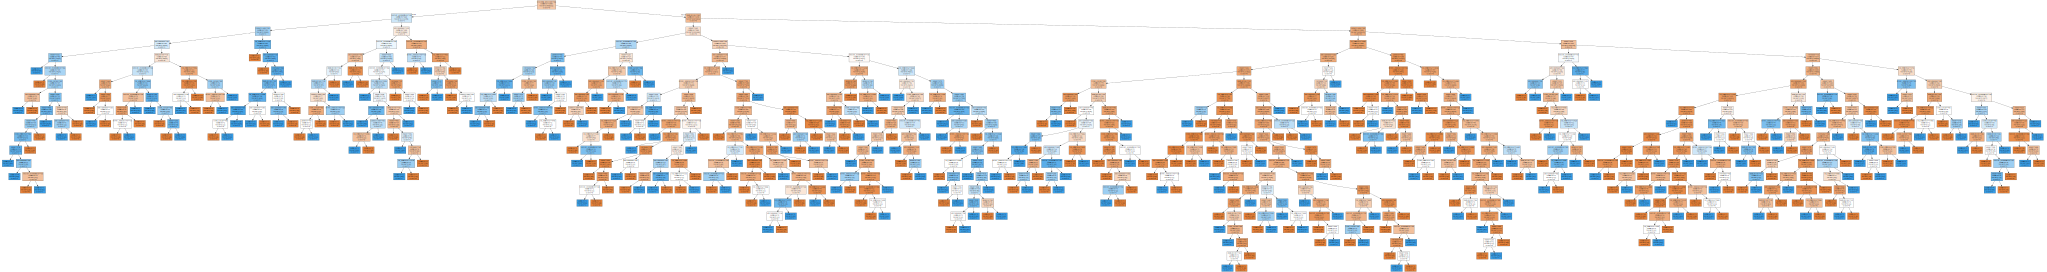

In [35]:
# Visualización del árbol
export_graphviz(arbol1,out_file= 'arbol1.dot', class_names=['0','1'],
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

In [36]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.69      0.69      0.69       965
   Accidentado       0.43      0.43      0.43       535

      accuracy                           0.60      1500
     macro avg       0.56      0.56      0.56      1500
  weighted avg       0.60      0.60      0.60      1500



Matriz de confusión:
[[463  78]
 [154 372]]


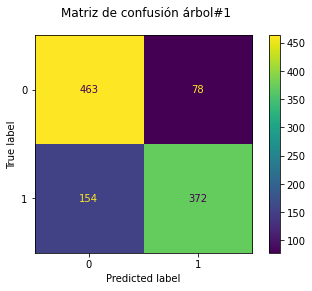

In [60]:
#0: No accidentado
#1: accidentado
disp = metrics.plot_confusion_matrix(arbol1, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión árbol#1")
print(f"Matriz de confusión:\n{disp.confusion_matrix}")

plt.show()

## Podando el árbol

In [37]:
arbol2 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7, max_depth= 4)
arbol2.fit(X_train,y_train)
y_pred = arbol2.predict(X_test)     
print("La exactitud del árbol de clasificación con poda es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación con poda es: 0.6713333333333333


### Visualización del árbol con poda

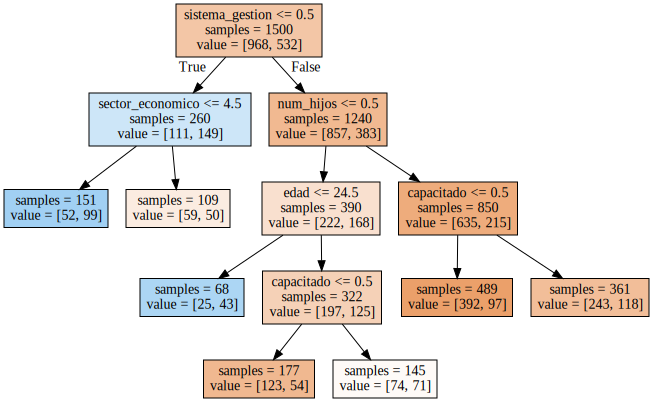

In [11]:
export_graphviz(arbol2,out_file= 'arbol2.dot', 
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol2.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

In [12]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.68      0.91      0.78       965
   Accidentado       0.60      0.24      0.34       535

      accuracy                           0.67      1500
     macro avg       0.64      0.57      0.56      1500
  weighted avg       0.65      0.67      0.62      1500



## Identificar importancia de variables

In [38]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(arbol2)
clf.fit(X, y)
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

ranking_vars=pd.DataFrame({"vars":feature_cols,
                           "importancia":feature_importances})
ranking_vars

,vars,importancia
0,edad,0.167354
1,genero,0.000000
2,nivel_educativo,0.000000
3,num_hijos,0.232164
4,tipo_cargo,0.037433
5,capacitado,0.095487
6,jornada,0.036949
7,antiguedad,0.000000
8,id_empresa,0.011591
9,sector_economico,0.021104


## Métricas de desempeño complementarias

### Recall

In [39]:
recall_score(y_test, y_pred, average='weighted')

0.6713333333333333

### Matriz de confusión

Matriz de confusión:
[[880  85]
 [408 127]]


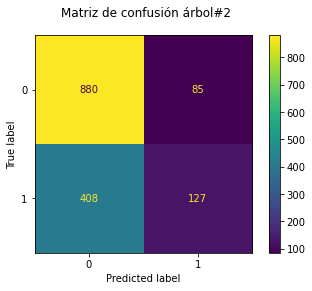

In [40]:
#0: No accidentado
#1: accidentado
disp = metrics.plot_confusion_matrix(arbol2, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión árbol#2")
print(f"Matriz de confusión:\n{disp.confusion_matrix}")

plt.show()

In [41]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.68      0.91      0.78       965
   Accidentado       0.60      0.24      0.34       535

      accuracy                           0.67      1500
     macro avg       0.64      0.57      0.56      1500
  weighted avg       0.65      0.67      0.62      1500



## Tratamiendo del desbalanceo de clases (*class imbalanced problem, CIP*)
*Referencias* <br>
1. https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

### ¿Por qué hay *CIP*?

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


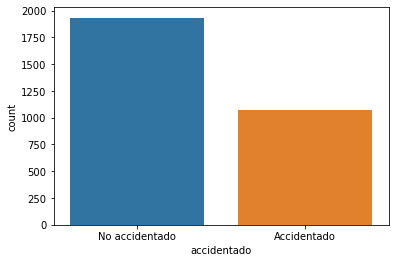

In [42]:
# Visualizando variable objetivo
g = sns.countplot(trabajadores_full['accidentado'])
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

### SVM Penalizado

In [43]:
# load library
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [44]:
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [45]:
svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.5402111277904218
Accuracy score: 0.5793333333333334
F1 score: 0.4063969896519285


### Random Forest

In [46]:
# load library
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.5847658709021355
Accuracy score: 0.6666666666666666
F1 score: 0.39024390243902435


### Técnica *Near Miss*

In [49]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

# print('Original dataset shape:', Counter(y))
# print('Resample dataset shape:', Counter(y_nm))

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


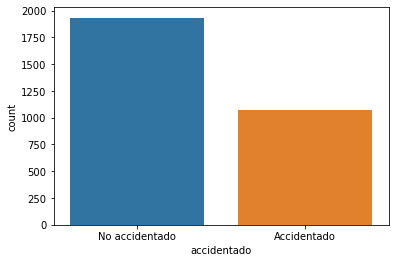

In [50]:
g = sns.countplot(y)
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


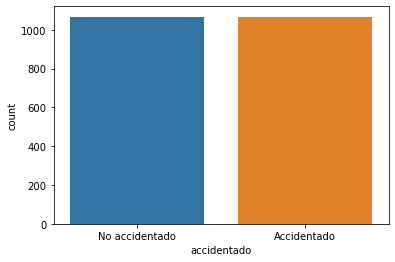

In [51]:
g = sns.countplot(y_nm)
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

## Árboles de decisión datos balanceados

In [52]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

In [53]:
X = x_nm
y = y_nm

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7, max_depth= 4)
arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)     
print("La exactitud del árbol de clasificación #3 es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación #3 es: 0.6166822867853796


In [55]:
metrics.zero_one_loss(y_test, y_pred)

0.3833177132146204

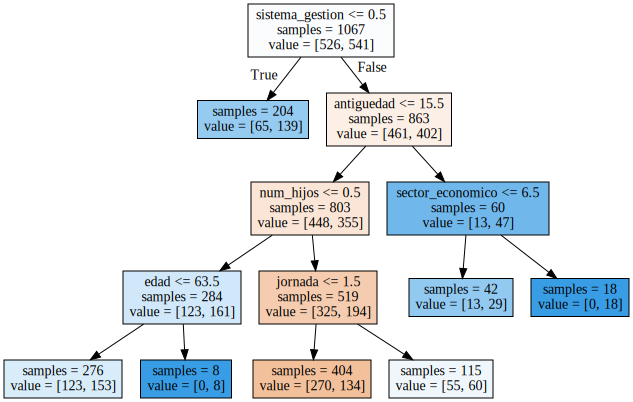

In [56]:
export_graphviz(arbol3,out_file= 'arbol3.dot', 
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol3.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

In [57]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(arbol3)
clf.fit(X, y)
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

ranking_vars=pd.DataFrame({"vars":feature_cols,
                           "importancia":feature_importances})
ranking_vars

,vars,importancia
0,edad,0.231505
1,genero,0.000000
2,nivel_educativo,0.000000
3,num_hijos,0.123828
4,tipo_cargo,0.013132
5,capacitado,0.011846
6,jornada,0.067299
7,antiguedad,0.232928
8,id_empresa,0.010035
9,sector_economico,0.019997


Matriz de confusión:
[[481  60]
 [385 141]]


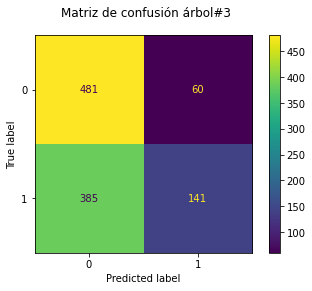

In [58]:
#0: No accidentado
#1: accidentado
disp = metrics.plot_confusion_matrix(arbol2, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión árbol#3")
print(f"Matriz de confusión:\n{disp.confusion_matrix}")

plt.show()

In [59]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.66      0.50      0.57       541
   Accidentado       0.59      0.74      0.65       526

      accuracy                           0.62      1067
     macro avg       0.63      0.62      0.61      1067
  weighted avg       0.63      0.62      0.61      1067

